In [1]:
import pandas as pd
# Set max columns to display
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

C:\Users\austinsh\AppData\Local\Temp\ipykernel_31948\3402816738.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Importing CSV files


# df_adjust_Limits = pd.read_csv('https://raw.githubusercontent.com/saust1/Project-OptiC4/main/1%20Preprocess/Continuous%20Data/contData_all.csv')

# df_adjustments = pd.read_csv('https://raw.githubusercontent.com/saust1/Project-OptiC4/main/CSV/PVs/adjust_limits.csv')


df_adjust_Limits = pd.read_csv(r"C:\Users\austinsh\Project-OptiC4\III Models\3 Model STEAM - FC55569\5 Preprocessing - Slecected Features\Continuous Data\contData_all.csv")

df_adjustments = pd.read_csv(r"C:\Users\austinsh\Project-OptiC4\II Data\1 Collection\CSV\PVs\adjust_limits.csv")


In [3]:
num_columns = df_adjust_Limits.shape[1]
print("Number of features:", num_columns)

Number of features: 15


In [4]:
# # Convert 'Date' column to datetime in df_adjust_Limits and df_LD using the appropriate format
# df_adjust_Limits['Date'] = pd.to_datetime(df_adjust_Limits['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# # Check for NaT entries in both dataframes
# nat_count_CD = df_adjust_Limits['Date'].isna().sum()

df_adjust_Limits.describe()

,425_pct_Al,Al2O3,C4_pct_Eth,C4_pct_H2O,C4_pct_Hex,DI55102,DI55152,DI55580,FC55003,FC55569,FC55576,FFC55555,LC90366,PI55020
count,92648.000000,92648.000000,92648.000000,92648.000000,92648.000000,92648.000000,92648.000000,92648.000000,92648.000000,92648.000000,92648.000000,92648.000000,92648.000000,92648.000000
mean,2.172608,11.165106,1.545477,20.764272,0.520617,0.932661,0.940931,0.989928,4484.990850,5108.283763,300.236850,1.902502,46.313518,-1.116935
std,160.794683,0.713747,3.799098,4.415958,0.813448,0.071233,0.056765,0.057563,2700.219364,2718.408076,292.220176,28.377834,26.724949,1.250460
min,-9986.000000,8.710000,0.001000,0.057000,0.000000,0.000000,0.000000,0.000000,-24.455300,0.000000,-9.608200,0.000000,0.000000,-9.653360
25%,5.971200,10.702700,0.657354,18.114100,0.322000,0.891762,0.914695,0.962844,2352.062500,5491.365000,0.000000,0.710198,25.243000,-2.080387
50%,6.117150,11.383600,1.217510,20.336650,0.413662,0.944393,0.940732,0.992969,5559.690000,6436.095000,279.092000,0.761631,48.956400,-0.806269
75%,6.270895,11.647300,1.661537,22.902125,0.522062,0.985226,0.972649,1.024042,6312.087500,6733.765000,474.654750,0.782054,67.996600,0.000000
max,8.058320,12.907000,90.136000,95.818000,15.840400,1.212410,1.317230,1.165180,20772.500000,12933.400000,1517.970000,1224.330000,87.901600,8.981880


In [5]:
# Annotate all range adjustements with rationale

#df_adjustments = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Data\CSV to PRocess\RangeD.csv")
df_adjustments

,Range,425_pct_Al,Butanol,Decanol,FC42428,FC52018,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FI55580,FYC55553,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,PI55560,TC52015,TC55552,TC55553,TC55555,TC55566,TI40050,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023,TI55565,TI90366,TI90368,AYC55580,DI52018,DI55102,DI55152,DI55580,TI52014,VI52558B
0,Min,0,0,0,0,5000,0,0,0,0,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-10.0,-10.0,-4.7,0,100,100,100,0,0,0,0,0,0,0,0,0,150,0,0,0.5,0.8,0.75,0,0,0
1,Max,10,100,10,50000,50000,40000,3000,70000,70000,52000,70000,12800,1500,10,1,70000,60000,100,100,100,100,100,100,100,20.3,20.3,10.3,250.0,300,275,300,300,125,300,300,300,300,300,350,350,300,200,200,20,0.5,1.2,1.30,100,200,11


In [6]:
#Finds and removes system limit (Min/Max) values

# Assuming df_adjustments and df_adjust_Limits are your dataframes

# Extract the min and max rows from df_adjustments into separate Series
min_values = df_adjustments[df_adjustments['Range'] == 'Min'].iloc[0, 1:]
max_values = df_adjustments[df_adjustments['Range'] == 'Max'].iloc[0, 1:]

# Iterate through each column in df_adjust_Limits
for col in df_adjust_Limits.columns:
    # Check if the column exists in df_adjustments
    if col in min_values.index:
        # Get the min and max values for this column from df_adjustments
        min_val = min_values[col]
        max_val = max_values[col]
        
        # Filter out values in df_adjust_Limits that are less than min or greater than max
        df_adjust_Limits.loc[df_adjust_Limits[col] < min_val, col] = None
        df_adjust_Limits.loc[df_adjust_Limits[col] > max_val, col] = None


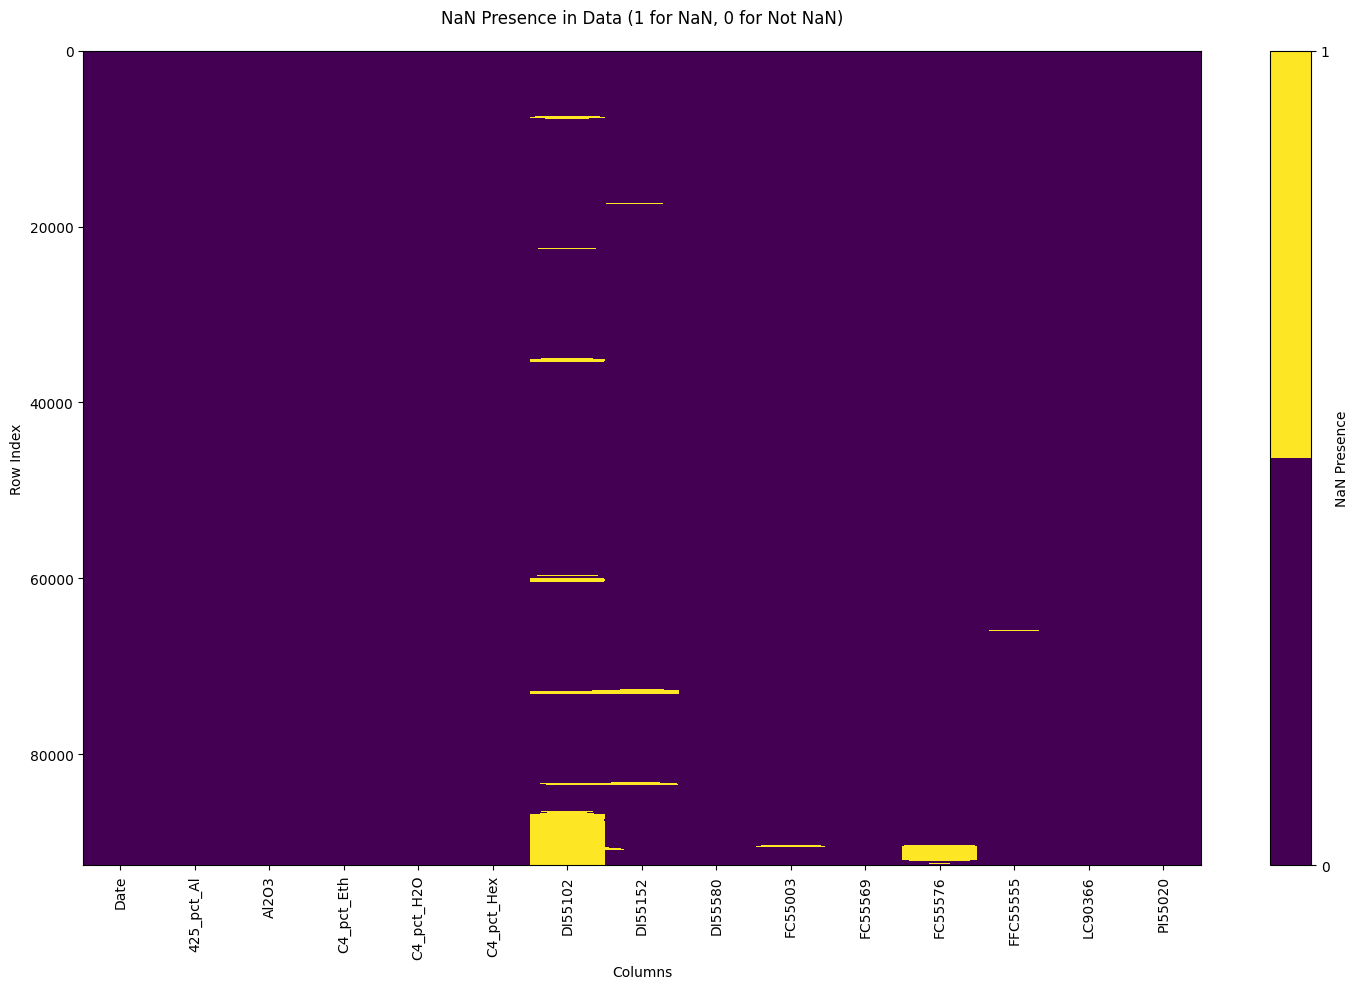

In [7]:
# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_adjust_Limits.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_adjust_Limits.shape[1]), df_adjust_Limits.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()

In [8]:
# Calculate the statistics for each column in df_adjust_Limits
total_rows = len(df_adjust_Limits)
non_nan_count = df_adjust_Limits.count()
nan_count = df_adjust_Limits.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_adjust_Limits.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

            ID  total_rows  non_nan_count  nan_count  nan_percentage
0         Date       92648          92648          0        0.000000
1   425_pct_Al       92648          92578         70        0.075555
2        Al2O3       92648          92648          0        0.000000
3   C4_pct_Eth       92648          92648          0        0.000000
4   C4_pct_H2O       92648          92648          0        0.000000
5   C4_pct_Hex       92648          92648          0        0.000000
6      DI55102       92648          83874       8774        9.470253
7      DI55152       92648          91362       1286        1.388049
8      DI55580       92648          92648          0        0.000000
9      FC55003       92648          92401        247        0.266600
10     FC55569       92648          92644          4        0.004317
11     FC55576       92648          90559       2089        2.254771
12    FFC55555       92648          92148        500        0.539677
13     LC90366       92648        

In [9]:
#Analysis of remaining NaNs suggests minimal impact - REMOVE

df_adjust_Limits = df_adjust_Limits.dropna()

# Calculate the statistics for each column in df_pivot
total_rows = len(df_adjust_Limits)
non_nan_count = df_adjust_Limits.count()
nan_count = df_adjust_Limits.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_adjust_Limits.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

            ID  total_rows  non_nan_count  nan_count  nan_percentage
0         Date       82888          82888          0             0.0
1   425_pct_Al       82888          82888          0             0.0
2        Al2O3       82888          82888          0             0.0
3   C4_pct_Eth       82888          82888          0             0.0
4   C4_pct_H2O       82888          82888          0             0.0
5   C4_pct_Hex       82888          82888          0             0.0
6      DI55102       82888          82888          0             0.0
7      DI55152       82888          82888          0             0.0
8      DI55580       82888          82888          0             0.0
9      FC55003       82888          82888          0             0.0
10     FC55569       82888          82888          0             0.0
11     FC55576       82888          82888          0             0.0
12    FFC55555       82888          82888          0             0.0
13     LC90366       82888        

In [10]:
# 59840 Records with all features included for preprocessing

df_adjust_Limits = df_adjust_Limits.sort_values('Date')
df_adjust_Limits = df_adjust_Limits.reset_index(drop=True)


# Save DataFrame to CSV file in the same directory as the Jupyter Notebook
# df_adjust_Limits.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\adjusted_Limits.csv', index=False)

#bordeCode
df_adjust_Limits.to_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model STEAM - FC55569\5 Preprocessing - Slecected Features\Continuous Data\adjusted_Limits.csv', index=False)

In [11]:
df_adjust_Limits.describe()



,425_pct_Al,Al2O3,C4_pct_Eth,C4_pct_H2O,C4_pct_Hex,DI55102,DI55152,DI55580,FC55003,FC55569,FC55576,FFC55555,LC90366,PI55020
count,82888.000000,82888.000000,82888.000000,82888.000000,82888.000000,82888.000000,82888.000000,82888.000000,82888.000000,82888.000000,82888.000000,82888.000000,82888.000000,82888.000000
mean,6.067883,11.282832,1.561971,21.012659,0.521339,0.946988,0.940055,0.996303,4688.925313,5264.747422,300.988808,0.603417,46.367388,-1.135314
std,0.581750,0.604353,4.002211,4.507376,0.777958,0.055889,0.041684,0.048850,2623.263618,2657.709650,277.898177,0.318799,27.192318,1.236350
min,0.037102,8.710000,0.001000,0.057000,0.000000,0.800002,0.753114,0.675018,0.000000,0.000000,0.000000,0.000000,0.000000,-9.653360
25%,5.980275,10.897300,0.643115,18.375575,0.323286,0.910066,0.914531,0.966440,4134.605000,5939.900000,2.286200,0.727797,24.357325,-2.081270
50%,6.129155,11.435700,1.175200,20.795250,0.426301,0.953143,0.938121,0.995610,5677.965000,6463.335000,286.276500,0.761364,48.482900,-0.837891
75%,6.277975,11.670800,1.657680,23.007300,0.531902,0.988742,0.963343,1.028262,6380.740000,6749.255000,467.400250,0.780830,70.469900,-0.008236
max,8.058320,12.907000,90.136000,95.818000,13.392400,1.192060,1.214180,1.165180,20772.500000,10929.000000,1463.170000,1.000000,87.901600,8.127770


In [12]:
# 59840 Records with all features included for preprocessing

In [13]:
from datetime import datetime

# Get the current date and time
current_date_time = datetime.now()

# Print the current date and time
print(current_date_time)


2024-05-06 01:53:52.506656
